In [14]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import math

print(tf.__version__)

2.8.0


In [2]:
# Define Constant
batchSize = 128
epochs = 100
numClasses = 10 #mnist (0~9)

In [3]:
# Downliad MNIST Dataset
mnist = keras.datasets.mnist
(trainImages, trainLabels), (testImages, testLabels) = mnist.load_data()

In [4]:
print(len(trainImages))
print(len(testImages))

60000
10000


In [5]:
# Normalize the input image so that each pixel values is between 0 to 1
trainImages = trainImages/255.0
testImages = testImages/255.0


In [6]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(numClasses, activation='softmax')
])

In [7]:
model.compile(optimizer="adam", 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])


In [8]:
history = model.fit(trainImages, trainLabels, 
                    epochs=epochs, batch_size=batchSize)

Epoch 1/100


C:\Users\Jin\anaconda3\envs\DL\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


469/469 [==============================] - 2s 2ms/step - loss: 0.3640 - accuracy: 0.8995
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1671 - accuracy: 0.9531
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 0.1202 - accuracy: 0.9655
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0907 - accuracy: 0.9741
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0738 - accuracy: 0.9785
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0603 - accuracy: 0.9829
Epoch 7/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0499 - accuracy: 0.9855
Epoch 8/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0431 - accuracy: 0.9875
Epoch 9/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0356 - accuracy: 0.9903
Epoch 10/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0304 - accuracy: 0.9920
E

In [9]:
# Evaluate the model using test dataset
testLoss, testAccuracy = model.evaluate(testImages, testLabels)
print(testLoss, testAccuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1334 - accuracy: 0.9800
0.13342857360839844 0.9800000190734863


In [15]:
# Helper function to display digit images
def show_sample(images, labels, sample_count=25):
  # Create a square with can fit {sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))
  
  plt.figure(figsize=(2*grid_count, 2*grid_count))
  for i in range(sample_count):
    plt.subplot(grid_count, grid_count, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.xlabel(labels[i])
  plt.show()

# Helper function to display specific digit images
def show_sample_digit(images, labels, digit, sample_count=25):
  # Create a square with can fit {sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))
  
  plt.figure(figsize=(2*grid_count, 2*grid_count))
  i = 0
  digit_count = 0
  while digit_count < sample_count:
    i += 1
    if (digit == labels[i]):
      plt.subplot(grid_count, grid_count, digit_count+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[i], cmap=plt.cm.gray)
      plt.xlabel(labels[i])
      digit_count += 1
  plt.show()


# Helper function to display specific digit images
def show_digit_image(image):
  # Draw digit image
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  # Major ticks every 20, minor ticks every 5
  major_ticks = np.arange(0, 29, 5)
  minor_ticks = np.arange(0, 29, 1)
  ax.set_xticks(major_ticks)
  ax.set_xticks(minor_ticks, minor=True)
  ax.set_yticks(major_ticks)
  ax.set_yticks(minor_ticks, minor=True)
  # And a corresponding grid
  ax.grid(which='both')
  # Or if you want different settings for the grids:
  ax.grid(which='minor', alpha=0.2)
  ax.grid(which='major', alpha=0.5)
  ax.imshow(image, cmap=plt.cm.binary)

  plt.show()

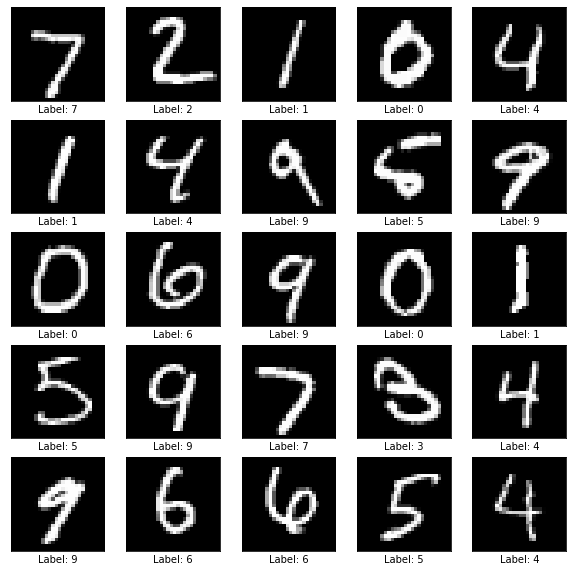

In [16]:
# Show the first 25 images in the training dataset.
show_sample(testImages, ['Label: %s' % label for label in testLabels])

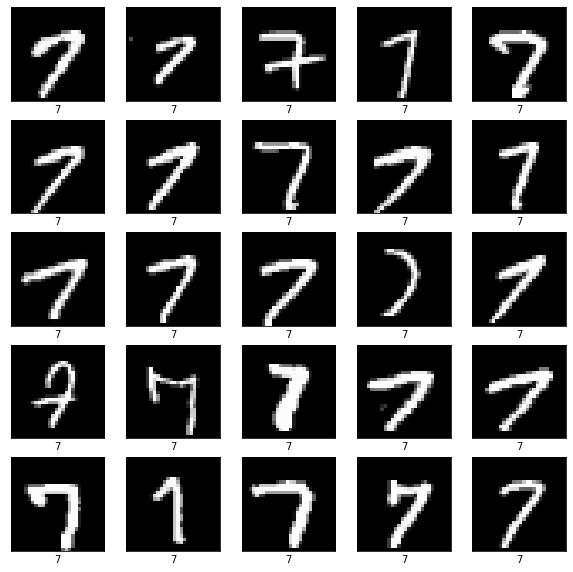

In [18]:
# Show digit 7 the first 25 images in the training dataset.
show_sample_digit(trainImages, trainLabels, 7, sample_count=25)


Text(0, 0.5, 'loss')

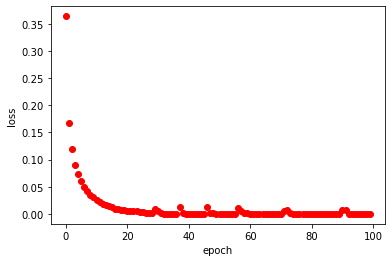

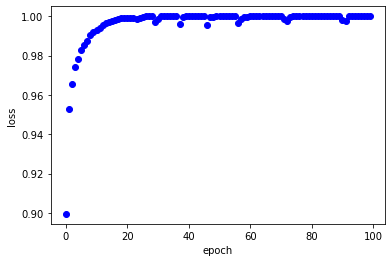

In [23]:
# Evaluate the model using test dataset. - Show performance
fig, loss_ax = plt.subplots()
fig, acc_ax = plt.subplots()

loss_ax.plot(history.history['loss'], 'ro')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax.plot(history.history['accuracy'], 'bo')
acc_ax.set_xlabel('epoch')
acc_ax.set_ylabel('loss')


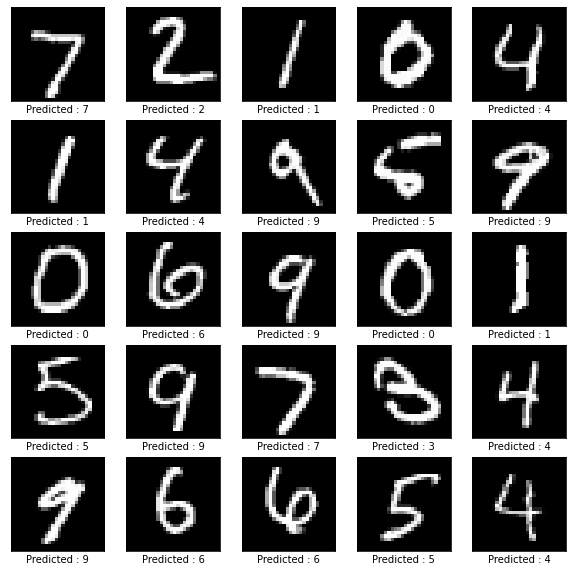

In [24]:
# Precict the label of digit images in our test dataset
predictions = model.predict(testImages)

# Plot the first 25 test images and their predicted label
show_sample(testImages, ["Predicted : %d" % np.argmax(result) for result in predictions])

Number is  3


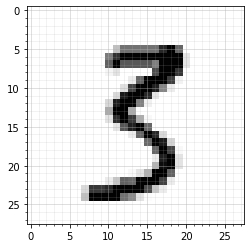

In [36]:
digit = 3532
selected_digit = digit - 1

result = predictions[selected_digit]
result_number = np.argmax(result)
print('Number is %2d' % result_number)
show_digit_image(testImages[selected_digit])